In [1]:
import pandas as pd
#from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('nasdaq100.csv',sep=';')
df

,Date,Starting (USD),Ending (USD)
0,01.01.24,16800,16500
1,01.12.23,15900,16100
2,01.11.23,15800,15300
3,01.10.23,16100,16200
4,01.09.23,16300,15700
5,01.08.23,16800,16400
6,01.07.23,15900,16200
7,01.06.23,15800,15500
8,01.05.23,16150,16100
9,01.04.23,16300,15800


In [3]:
df.isnull().sum()

Date              0
Starting (USD)    0
Ending (USD)      0
dtype: int64

In [4]:
df =df.drop(columns=['Date'])

In [5]:
df.head()

,Starting (USD),Ending (USD)
0,16800,16500
1,15900,16100
2,15800,15300
3,16100,16200
4,16300,15700


In [6]:
#pip install matplotlib
#from matplotlib import pyplot as plt

In [7]:
#pip install scikit-learn

In [8]:
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'Masdaq100 Stock Price')

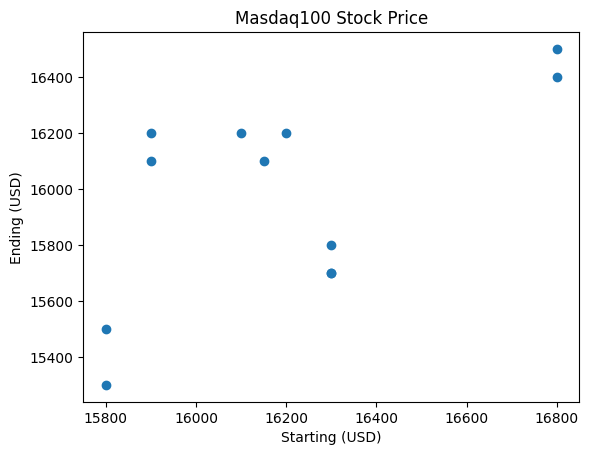

In [9]:
plt.scatter(df['Starting (USD)'],df['Ending (USD)'])
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('Masdaq100 Stock Price')

In [10]:
x= df.drop('Ending (USD)', axis=1)

In [11]:
x.head()

,Starting (USD)
0,16800
1,15900
2,15800
3,16100
4,16300


In [12]:
y= df.drop('Starting (USD)', axis=1)

In [13]:
y.head()

,Ending (USD)
0,16500
1,16100
2,15300
3,16200
4,15700


In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
reg= LinearRegression()

In [16]:
x.mean()

Starting (USD)    16195.833333
dtype: float64

In [17]:
y.mean()

Ending (USD)    15975.0
dtype: float64

Text(0.5, 1.0, 'Masdaq100 Stock Price')

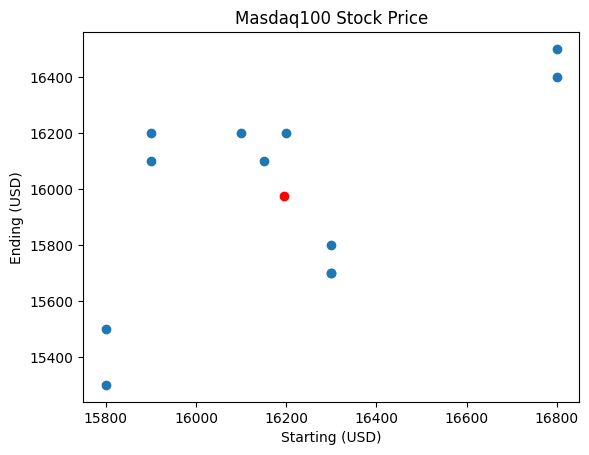

In [18]:
plt.scatter(x.mean(),y.mean(),color= 'red')
plt.scatter(df['Starting (USD)'],df['Ending (USD)'])
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('Masdaq100 Stock Price')

In [19]:
reg.fit(x,y) #Training the model

LinearRegression()

In [20]:
m=reg.coef_
m

array([[0.65258293]])

In [21]:
c=reg.intercept_
c

array([5405.87555702])

In [22]:
#y= mx+c
m*16700 +c

array([[16304.0105628]])

In [23]:
reg.predict([[16700]])


c:\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[16304.0105628]])

In [24]:
df['Predicted_y'] = reg.predict(x)

#df =df.drop('Predicted_newy',axis = 1)
df.head()

,Starting (USD),Ending (USD),Predicted_y
0,16800,16500,16369.268856
1,15900,16100,15781.944215
2,15800,15300,15716.685922
3,16100,16200,15912.460802
4,16300,15700,16042.977389


Text(0.5, 1.0, 'Masdaq100 Stock Price')

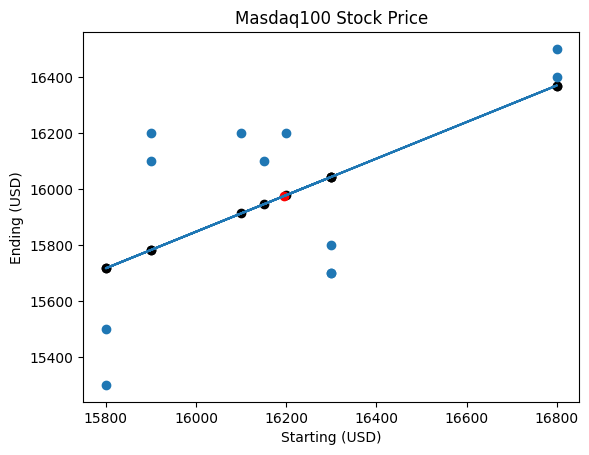

In [25]:
plt.plot(x,df['Predicted_y'])
plt.scatter(x,df['Predicted_y'], color = 'black')
plt.scatter(x.mean(),y.mean(),color= 'red')
plt.scatter(df['Starting (USD)'],df['Ending (USD)'])
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('Masdaq100 Stock Price')

In [26]:
reg.predict([[16600]])

c:\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[16238.75226935]])

Loss & Cost 

In [27]:
df.head()

,Starting (USD),Ending (USD),Predicted_y
0,16800,16500,16369.268856
1,15900,16100,15781.944215
2,15800,15300,15716.685922
3,16100,16200,15912.460802
4,16300,15700,16042.977389


In [28]:
df['Loss'] = df['Ending (USD)']- df['Predicted_y']
df.head()

,Starting (USD),Ending (USD),Predicted_y,Loss
0,16800,16500,16369.268856,130.731144
1,15900,16100,15781.944215,318.055785
2,15800,15300,15716.685922,-416.685922
3,16100,16200,15912.460802,287.539198
4,16300,15700,16042.977389,-342.977389


In [29]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [30]:
mse = mean_squared_error(df['Ending (USD)'],df['Predicted_y'])
mse

80411.23397700385

In [31]:
mae =mean_absolute_error(df['Ending (USD)'],df['Predicted_y'])
mae

260.3840017604666

In [32]:
df['Absolute']=abs(df['Loss'])
df

,Starting (USD),Ending (USD),Predicted_y,Loss,Absolute
0,16800,16500,16369.268856,130.731144,130.731144
1,15900,16100,15781.944215,318.055785,318.055785
2,15800,15300,15716.685922,-416.685922,416.685922
3,16100,16200,15912.460802,287.539198,287.539198
4,16300,15700,16042.977389,-342.977389,342.977389
5,16800,16400,16369.268856,30.731144,30.731144
6,15900,16200,15781.944215,418.055785,418.055785
7,15800,15500,15716.685922,-216.685922,216.685922
8,16150,16100,15945.089949,154.910051,154.910051
9,16300,15800,16042.977389,-242.977389,242.977389


In [33]:
sum(df['Absolute'])/len(x)

260.3840017604666

In [34]:
reg.score(x,y)

0.3577804940272571